# Data Exploring

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline
import datetime
import os
import seaborn as sns

In [16]:
train = pd.read_csv("train_users_2.csv")
test = pd.read_csv("test_users.csv")

In [17]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [18]:
test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [20]:
print(train.info(),'\n',test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB
<class 'pandas.core.frame.D

In [22]:
print(train.shape,test.shape)
print(train.isnull().sum(),'\n',test.isnull().sum())

(213451, 16) (62096, 15)
id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64 
 id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app          

## Explore Each Feature

### date_account_created

In [24]:
dac_train=train.date_account_created.value_counts()
dac_test=test.date_account_created.value_counts()
print(dac_train,dac_test)
print('train.date_account_created:',
      dac_train.describe(),
      'test.date_account_created:\n',
      dac_test.describe())

2014-05-13    674
2014-06-24    670
2014-06-25    636
2014-05-20    632
2014-05-14    622
2014-05-21    602
2014-06-03    602
2014-06-16    598
2014-06-11    593
2014-05-28    590
2014-06-30    590
2014-06-26    587
2014-04-23    587
2014-06-23    586
2014-06-09    577
2014-06-19    564
2014-06-18    564
2014-06-04    562
2014-06-27    557
2014-05-19    556
2014-06-10    555
2014-06-05    550
2014-06-17    548
2014-06-20    544
2014-05-22    543
2014-05-16    534
2014-06-02    534
2014-05-15    530
2014-06-12    524
2014-04-29    519
             ... 
2010-01-16      2
2010-02-07      2
2010-02-17      2
2010-06-26      2
2010-04-16      2
2010-01-13      2
2010-03-21      2
2010-02-04      2
2010-03-28      2
2010-01-21      2
2010-05-29      2
2010-02-03      2
2010-06-12      2
2010-04-08      2
2010-01-30      2
2010-02-08      2
2010-03-09      1
2010-04-01      1
2010-01-31      1
2010-01-08      1
2010-01-19      1
2010-04-11      1
2010-01-28      1
2010-01-01      1
2010-01-02

In [25]:
dac_train_data=pd.to_datetime(dac_train.index)
dac_test_data=pd.to_datetime(dac_test.index)

dac_train_day=dac_train_data-dac_train_data.min()
dac_test_day=dac_test_data-dac_train_data.min()

print(dac_train_day,'\n',dac_test_day)

TimedeltaIndex(['1593 days', '1635 days', '1636 days', '1600 days',
                '1594 days', '1601 days', '1614 days', '1627 days',
                '1622 days', '1608 days',
                ...
                  '18 days',  '100 days',   '27 days',    '0 days',
                   '1 days',    '2 days',   '44 days',  '113 days',
                  '22 days',  '168 days'],
               dtype='timedelta64[ns]', length=1634, freq=None) 
 TimedeltaIndex(['1664 days', '1663 days', '1658 days', '1665 days',
                '1659 days', '1662 days', '1699 days', '1698 days',
                '1670 days', '1678 days', '1671 days', '1684 days',
                '1683 days', '1677 days', '1700 days', '1669 days',
                '1657 days', '1666 days', '1719 days', '1672 days',
                '1686 days', '1691 days', '1713 days', '1679 days',
                '1680 days', '1661 days', '1685 days', '1706 days',
                '1676 days', '1697 days', '1727 days', '1660 days',
             

In [26]:
dac_train_day.days

Int64Index([1593, 1635, 1636, 1600, 1594, 1601, 1614, 1627, 1622, 1608,
            ...
              18,  100,   27,    0,    1,    2,   44,  113,   22,  168],
           dtype='int64', length=1634)

Text(0.5, 1.0, 'Accounts created vs day')

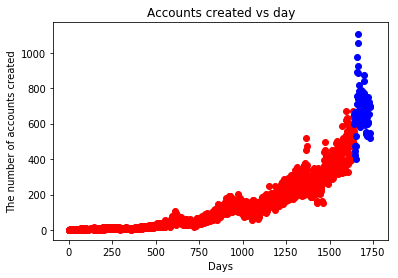

In [27]:
plt.scatter(dac_train_day.days,dac_train.values,color='r',label='train_datasets')
plt.scatter(dac_test_day.days,dac_test.values,color='b',label='test_datasets')
plt.xlabel("Days")
plt.ylabel("The number of accounts created")
plt.title('Accounts created vs day')

### timestamp_first_active

In [29]:
tfa_train=train.timestamp_first_active
tfa_train

0         20090319043255
1         20090523174809
2         20090609231247
3         20091031060129
4         20091208061105
5         20100101215619
6         20100102012558
7         20100103191905
8         20100104004211
9         20100104023758
10        20100104194251
11        20100105051812
12        20100105060859
13        20100105083259
14        20100107055820
15        20100107204555
16        20100107215125
17        20100107224625
18        20100108015641
19        20100110010817
20        20100110152120
21        20100110220941
22        20100111031438
23        20100111224015
24        20100111230808
25        20100112131444
26        20100112155420
27        20100112205949
28        20100113044650
29        20100113064333
               ...      
213421    20140630231137
213422    20140630231246
213423    20140630231548
213424    20140630231859
213425    20140630232119
213426    20140630232331
213427    20140630232539
213428    20140630232634
213429    20140630232712


In [30]:
tfa_train=train.timestamp_first_active.map(lambda x: datetime.datetime.strptime(str(x),'%Y%m%d%H%M%S'))
tfa_train.head()

0   2009-03-19 04:32:55
1   2009-05-23 17:48:09
2   2009-06-09 23:12:47
3   2009-10-31 06:01:29
4   2009-12-08 06:11:05
Name: timestamp_first_active, dtype: datetime64[ns]

In [32]:
tfa_train.describe()

count                  213451
unique                 213451
top       2013-07-01 05:26:34
freq                        1
first     2009-03-19 04:32:55
last      2014-06-30 23:58:24
Name: timestamp_first_active, dtype: object

### age

In [33]:
train.age.isnull().sum()

87990

Text(0, 0.5, 'counts')

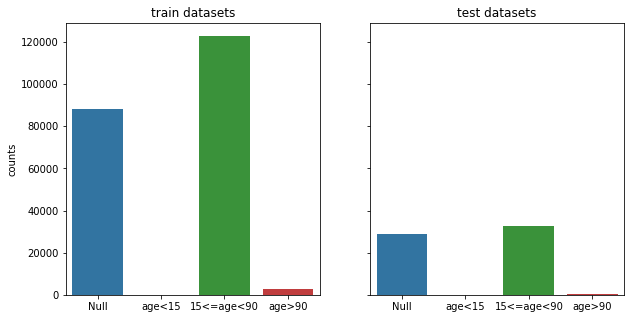

In [34]:
age_train=[train.age.isnull().sum(),
           train.query('age<15').age.shape[0],
           train.query('age>=15&age<90').age.shape[0],
           train.query('age>=90').age.shape[0]]
age_test=[test.age.isnull().sum(),
          test.query('age<15').age.shape[0],
          test.query('age>=15&age<90').age.shape[0],
          test.query('age>=90').age.shape[0]]

columns=['Null','age<15','15<=age<90','age>90']

fig,(ax1,ax2)=plt.subplots(1,2,sharex=True,sharey=True,figsize=(10,5))
sns.barplot(columns,age_train,ax=ax1)
sns.barplot(columns,age_test,ax=ax2)
ax1.set_title('train datasets')
ax2.set_title('test datasets')
ax1.set_ylabel('counts')

### Categorical features

In [ ]:
cate_feats = ['gender', 
             'signup_method', 
             'signup_flow', 
             'language', 
             'affiliate_channel', 
             'affiliate_provider', 
             'first_affiliate_tracked', 
             'signup_app', 
             'first_device_type', 
             'first_browser']

def feature_barplot(feature, df_train = train, df_test = test, figsize=(10,5), rot = 90, saveimg = False):
    
    feat_train = df_train[feature].value_counts()
    feat_test = df_test[feature].value_counts()
    
    fig_feature, (ax1,ax2) = plt.subplots(1,2,sharex=True, sharey = True, figsize = figsize)

    sns.barplot(feat_train.index.values, feat_train.values, ax = ax1)
    sns.barplot(feat_test.index.values, feat_test.values, ax = ax2)
    
    ax1.set_xticklabels(ax1.xaxis.get_majorticklabels(), rotation = rot)
    ax2.set_xticklabels(ax1.xaxis.get_majorticklabels(), rotation = rot)

    ax1.set_title(feature + ' of train dataset')
    ax2.set_title(feature + ' of test dataset')
    ax1.set_ylabel('counts')
    
    plt.tight_layout()
    
for feat in cate_feats:
    feature_barplot(feature = feat)

# Featur Enginnering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
#import pickle
import datetime
from datetime import date
#import os
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns
%matplotlib inline

In [2]:
df_session=pd.read_csv('sessions.csv')
print(df_session.columns)

Index(['user_id', 'action', 'action_type', 'action_detail', 'device_type',
       'secs_elapsed'],
      dtype='object')


In [3]:
for i in df_session.columns:
    print(df_session[i].value_counts(),end='')

vcmr2jh5ix    2085
yu5bdalz2b    1811
qkbkunyzq7    1780
s5ez13snz0    1685
bp4mwnlbxs    1526
jastc45uok    1518
tu41qoa28z    1410
wrccc4m1uw    1390
k3w4kskp4o    1382
ca8jmor156    1254
9zh7tdb4jr    1250
fm89u29kv7    1185
dzhwxl5uie    1184
a30puilbmc    1182
ytplei6boz    1182
337zc4etfh    1169
kquztvwe0z    1075
mpzaszcsz1    1010
66kf2va3x5     974
edkc9jwn5x     968
3jg5g7my08     950
jvo4exq16y     932
18caw1xkx8     925
x9041dfqiy     919
8ntgnjd9cd     919
fnrvq97pza     917
g6qpp37geu     912
xcbi3btmys     903
k6b12i0h6i     895
mutgv0rnlv     861
              ... 
bfd9g020f1       1
k92e4cvxv8       1
47djfohsaj       1
vxsj0dzmlo       1
mfxo2rzvdw       1
ef1hs0cxvj       1
bvg4n302sm       1
2ob1llz7b7       1
w63g43mc6z       1
q8c8zbp7k2       1
ataal2p89c       1
ga26zm08l8       1
7yvi8x4m54       1
djq53wbn6h       1
poss8nel28       1
8g392uznwi       1
w05poxe3um       1
na4kni56yc       1
ug7ttvf60s       1
bjkrtxys7g       1
s6em5bbewq       1
r8yzw3t22q  

In [4]:
df_session['id']=df_session['user_id']
df_session.drop(['user_id'],axis=1)

,action,action_type,action_detail,device_type,secs_elapsed,id
0,lookup,NaN,NaN,Windows Desktop,319.0,d1mm9tcy42
1,search_results,click,view_search_results,Windows Desktop,67753.0,d1mm9tcy42
2,lookup,NaN,NaN,Windows Desktop,301.0,d1mm9tcy42
3,search_results,click,view_search_results,Windows Desktop,22141.0,d1mm9tcy42
4,lookup,NaN,NaN,Windows Desktop,957.0,jpmpj40cvk
5,search_results,click,view_search_results,Windows Desktop,965.0,jpmpj40cvk
6,search_results,click,view_search_results,Windows Desktop,1021.0,jpmpj40cvk
7,search_results,click,view_search_results,Windows Desktop,938.0,jpmpj40cvk
8,search_results,click,view_search_results,Windows Desktop,2702.0,jpmpj40cvk
9,ajax_refresh_subtotal,click,change_trip_characteristics,Windows Desktop,674.0,jpmpj40cvk


In [5]:
df_session.shape

(1048575, 7)

In [6]:
df_session.isnull().sum()

user_id            2797
action             7873
action_type      143097
action_detail    143097
device_type           0
secs_elapsed      11067
id                 2797
dtype: int64

In [7]:
df_session.action=df_session.action.fillna('NAN')
df_session.action_type=df_session.action_type.fillna('NAN')
df_session.action_detail=df_session.action_detail.fillna('NAN')
df_session.device_type=df_session.device_type.fillna('NAN')

In [8]:
act=dict(zip(*np.unique(df_session.action,return_counts=True)))
df_session.action=df_session.action.apply(lambda x: 'OTHER' if act[x]<100 else x)##apply函数是对每一列进行函数操作，map是对每个元素进行函数操作

In [9]:
dgr_session=df_session.groupby(['id'])
for i in dgr_session:
    m=i[0]
    print(m)
    l=[]
    l.append(m)
    l.append(1)
    l+=[2]
    print(l)
    break

007gj7kqdk
['007gj7kqdk', 1, 2]


In [10]:
df_session.action.value_counts()

show                              209655
search_results                    109430
personalize                       105718
lookup                             88302
ajax_refresh_subtotal              71482
index                              69441
similar_listings                   53814
update                             38829
search                             26520
header_userpic                     17332
create                             17262
track_page_view                    17089
active                             15855
social_connections                 15301
collections                        12763
dashboard                           9535
calendar_tab_inner2                 9353
ajax_check_dates                    8387
NAN                                 7873
edit                                7716
confirm_email                       7424
ask_question                        6994
requested                           6242
authenticate                        6021
other_hosting_re

In [11]:
f_act=df_session.action.value_counts().argsort()
f_act_detail = df_session.action_detail.value_counts().argsort()
f_act_type = df_session.action_type.value_counts().argsort()
f_dev_type = df_session.device_type.value_counts().argsort()

In [12]:
samples=[]
cont=0
ln=len(dgr_session)

for g in dgr_session:
    if cont%10000==0:
        print('%s from %s'%(cont,ln))
    gr=g[1]
    l=[]
    l.append(g[0])
    l.append(len(gr))
    sev=gr.secs_elapsed.fillna(0).values
    
    c_act=[0]*len(f_act)
    for i,v in enumerate(gr.action.values):
        c_act[f_act[v]]+=1
    _,c_act_uqc=np.unique(gr.action.values,return_counts=True)
    c_act+=[len(c_act_uqc),np.mean(c_act_uqc),np.std(c_act_uqc)]
    l=l+c_act
    
    c_act_detail = [0] * len(f_act_detail)
    for i,v in enumerate(gr.action_detail.values):
        c_act_detail[f_act_detail[v]] += 1 
    _, c_act_det_uqc = np.unique(gr.action_detail.values, return_counts=True)
    c_act_detail += [len(c_act_det_uqc), np.mean(c_act_det_uqc), np.std(c_act_det_uqc)]
    l=l+c_act_detail
    
    c_act_type=[0]*len(f_act_type)
    l_act_type=[0]*len(f_act_type)
    for i,v in enumerate(gr.action_type.values):
        c_act_type[f_act_type[v]]+=1
        l_act_type[f_act_type[v]]+=sev[i]
    l_act_type=np.log(1+np.array(l_act_type)).tolist()
    _, c_act_type_uqc = np.unique(gr.action_type.values, return_counts=True)
    c_act_type += [len(c_act_type_uqc), np.mean(c_act_type_uqc), np.std(c_act_type_uqc)]
    l=l+c_act_type+l_act_type
    
    c_dev_type=[0]*len(f_dev_type)
    for i,v in enumerate(gr.device_type.values):
        c_dev_type[f_dev_type[v]]+=1
    _, c_dev_type_uqc=np.unique(gr.device_type.values,return_counts=True)
    c_dev_type+=[len(c_dev_type_uqc),np.mean(c_dev_type_uqc),np.std(c_dev_type_uqc)]
    l=l+c_dev_type
    
    l_secs=[0]*5
    l_log=[0]*15
    if len(sev)>0:
        l_secs[0]=np.log(1+np.sum(sev))
        l_secs[1]=np.log(1+np.mean(sev))
        l_secs[2]=np.log(1+np.std(sev))
        l_secs[3]=np.log(1+np.median(sev))
        l_secs[4]=l_secs[0]/float(l[1])
    
        log_sev=np.log(1+sev).astype(int)
        l_log=np.bincount(log_sev,minlength=15).tolist()
    l=l+l_secs+l_log
    
    samples.append(l)
    cont+=1

0 from 15588
10000 from 15588


In [13]:
samples=np.array(samples)
samp_ar=samples[:,1:].astype(np.float16)##将数据改为浮点型
samp_id=samples[:,0]

col_names=[]
for i in range(len(samples[0])-1):
    col_names.append('c_'+str(i))
df_agg_sess=pd.DataFrame(samp_ar,columns=col_names)##构造用户数据矩阵
df_agg_sess['id']=samp_id
df_agg_sess.index=df_agg_sess.id

In [14]:
df_agg_sess.shape

(15588, 293)